# Yulone image preprocessing  

In [1]:
import cv2

In [2]:
from pyspark import SparkContext, SparkConf

In [3]:
import numpy as np


In [4]:
import math


In [40]:
from  matplotlib import pyplot as plt

In [5]:
conf = SparkConf().setAppName("FirstNotebook")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession.builder \
    .master("local") \
    .appName("Word Count") \
    .getOrCreate()

In [6]:
meeky0=sc.textFile("gs://uga-dsp/project2/files/X_small_train.csv")

In [8]:
meeky0.first()

'Unnamed: 0,Face ID,Image File,Image Width,Image Height,X (top left),Y (top left),X (bottom right),Y (bottom right),x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24,x25,y25,x26,y26,x27,y27,x28,y28,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33,x34,y34,x35,y35,x36,y36,x37,y37,x38,y38,x39,y39,x40,y40,x41,y41,x42,y42,x43,y43,x44,y44,x45,y45,x46,y46,x47,y47,x48,y48,x49,y49,x50,y50,x51,y51,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56,x57,y57,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68,cd1,cd2,cd3,cd4,cd5,cd6,cd7,cd8,ca1,ca2,ca3,ca4,ca5,ca6,ca7,ca8,ca9,ca10,ca11,ca12,cr1,cr2,cr3,cr4,cr5,cr6,cr7,cr8,fs1,fs2,fc1,fc2,fc3,fc4,fc5,fc6,fc7,fc8,fc9,Sex (subj)'

In [20]:
meeky0.collect()[2][14:39]

'5700798023_d2d6e12786.jpg'

In [7]:
ImagePath="gs://uga-dsp/project2/images/"

In [8]:
meeky1=ImagePath+meeky0.collect()[2][14:39]

In [83]:
meeky1

'gs://uga-dsp/project2/images/5700798023_d2d6e12786.jpg'

In [10]:
df = spark.read.format("image").option("dropInvalid", True).load(meeky1)

In [15]:
rawbytes=df.select("image.data").collect()

In [71]:
info=df.select("image.width", "image.height","image.nChannels").collect()

In [75]:
info[0].__fields__

['width', 'height', 'nChannels']

In [80]:
meeky2=np.reshape(k,(info[0].height,info[0].width,info[0].nChannels))

In [85]:
type(meeky2
    )

numpy.ndarray

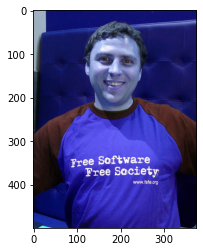

In [84]:
plt.imshow(meeky2)

In [90]:
meeky3=cv2.cvtColor(meeky2,cv2.COLOR_BGR2GRAY)

In [91]:
meeky2.shape

(500, 375, 3)

In [92]:
meeky3.shape

(500, 375)

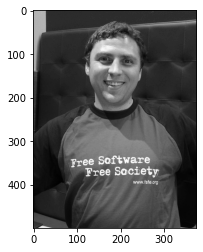

In [93]:
plt.imshow(meeky3,cmap='gray')

In [76]:
info[0].width

375

In [48]:
rawbytes[0].__fields__

['data']

In [54]:
type(rawbytes[0].data)

bytearray

In [68]:
k=np.asarray(rawbytes[0].data,np.uint8)

In [81]:
meeky2.shape

(500, 375, 3)

In [64]:
(rawbytes[0].data)[1]

166

In [43]:
type(bytes(rawbytes[0][0]))

bytes

In [57]:
img_np = cv2.imdecode(np.frombuffer(rawbytes[0].data,np.uint8), cv2.IMREAD_COLOR)

In [61]:
meeky2=cv2.imdecode(np.asarray(rawbytes[0].data,np.uint8), cv2.IMREAD_COLOR)

In [62]:
meeky2.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [58]:
img_np.shape

AttributeError: 'NoneType' object has no attribute 'shape'

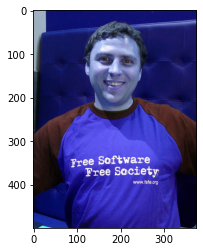

In [82]:
plt.imshow(meeky2)

In [ ]:
images = sc.binaryFiles('/tmp/images/*', 10)
